In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [11]:
ct = gpd.read_file(r"geo/lct_000b16a_e.zip")

In [12]:
cal_ct = ct[ct['CMANAME']=='Calgary']

In [13]:
cal_ct

,CTUID,CTNAME,PRUID,PRNAME,CMAUID,CMAPUID,CMANAME,CMATYPE,geometry
521,8250204.03,0204.03,48,Alberta,825,48825,Calgary,B,"POLYGON ((4721866.774 1923999.814, 4721366.451..."
565,8250201.01,0201.01,48,Alberta,825,48825,Calgary,B,"POLYGON ((4681607.283 1950607.369, 4681725.897..."
574,8250201.02,0201.02,48,Alberta,825,48825,Calgary,B,"POLYGON ((4666222.751 1976893.989, 4666543.574..."
576,8250200.03,0200.03,48,Alberta,825,48825,Calgary,B,"POLYGON ((4653424.837 1948201.417, 4653641.457..."
577,8250204.01,0204.01,48,Alberta,825,48825,Calgary,B,"POLYGON ((4710210.854 1899299.514, 4710469.103..."
...,...,...,...,...,...,...,...,...,...
5580,8250001.29,0001.29,48,Alberta,825,48825,Calgary,B,"POLYGON ((4679927.134 1909070.640, 4679982.283..."
5598,8250076.09,0076.09,48,Alberta,825,48825,Calgary,B,"POLYGON ((4689528.946 1930653.354, 4689505.157..."
5599,8250076.12,0076.12,48,Alberta,825,48825,Calgary,B,"POLYGON ((4689957.211 1933804.917, 4690002.617..."
5600,8250076.13,0076.13,48,Alberta,825,48825,Calgary,B,"POLYGON ((4686841.946 1937701.051, 4686829.877..."


<AxesSubplot:>

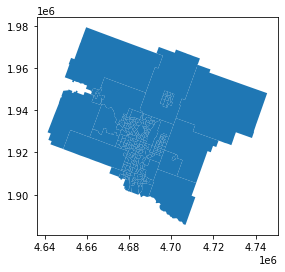

In [14]:
cal_ct.plot()

In [16]:
columns = ['CTUID','Condo','Freehold','Rental','Total']
apt_starts=pd.read_excel('starts_geo/Apt_Number of Housing Starts by CT, units.xlsx',engine = 'openpyxl',names=columns)
apt_starts = apt_starts[1:-2]

C:\Users\Maln\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [17]:
apt_starts['CTUID']=apt_starts['CTUID'].map('{:.2f}'.format)
apt_starts['CTUID']=apt_starts['CTUID'].astype(str)

In [18]:
merged_starts = cal_ct.merge(apt_starts,on='CTUID')

In [93]:
pd.concat([cal_ct.merge(apt_starts,on='CTUID')['CTUID'],apt_starts['CTUID']]).drop_duplicates(keep=False)

10     8259000.01
49     8259011.00
67     8259009.00
72     8259006.01
73     8259013.01
106    8259008.00
107    8259012.00
Name: CTUID, dtype: object

In [21]:
merged_starts.to_crs()

<Projected CRS: PROJCS["PCS_Lambert_Conformal_Conic",GEOGCS["NAD83 ...>
Name: PCS_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [36]:
import geoplot as gplt
import geoplot.crs as gcrs
import contextily as cx

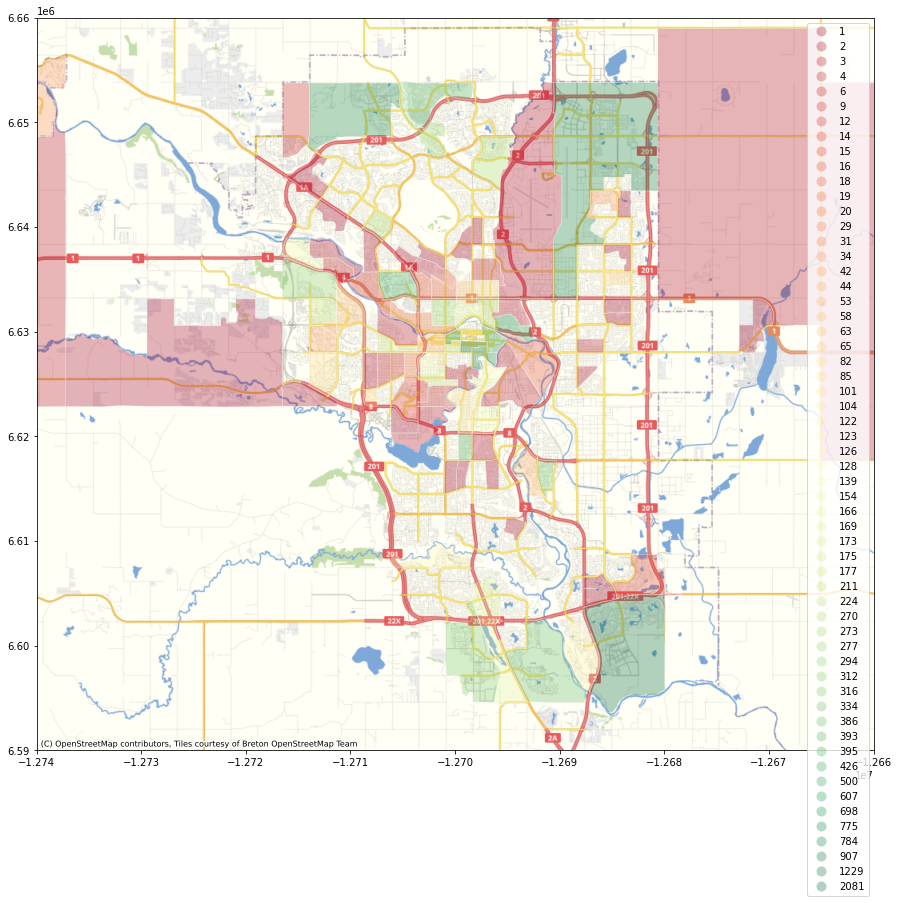

In [65]:
fig,ax = plt.subplots(1,1,figsize=(15,15))

merged_starts.to_crs(epsg='3857').plot(column='Total',cmap='RdYlGn',edgecolor='white', ax=ax,alpha = 0.3, legend = True)
minx=-1.274*10**7
maxx=-1.266*10**7
miny=6.59*10**6
maxy=6.66*10**6
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax ,source=cx.providers.OpenStreetMap.BZH)